In [159]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [539]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [540]:
# division
all_data = pd.read_csv(
    '/Users/keisuke/Downloads/Yokohama_National_university/image_recognition/all_sample/df_all.csv')
#all_data = all_data[~all_data[['strain', 'orien']].isnull().any(axis=1)].reset_index(drop=True)

In [343]:
# subtraction
all_data = pd.read_csv(
    '/Users/keisuke/Downloads/Yokohama_National_university/image_recognition/all_sample/df_all_subtraction.csv')

In [495]:
# division with sample
all_data = pd.read_csv(
'/Users/keisuke/Downloads/Yokohama_National_university/image_recognition/3rd-sample/output/csv_files/df.csv')

In [166]:
#体積減少率 12%
all_data = pd.read_csv(
    '/Users/keisuke/Downloads/Yokohama_National_university/Weka/data/csv_files/all_data.csv')
all_data = all_data[~all_data[['strain', 'orien']].isnull().any(axis=1)].reset_index(drop=True)
all_data['subtraction'] = (all_data['size'] - all_data['subtraction'])/all_data['size']
##体積減少率 4%
# all_data = pd.read_csv(
#     '/Users/keisuke/Downloads/Yokohama_National_university/image_recognition/output_all/df.csv')
# all_data = all_data[~all_data[['strain', 'orien']].isnull().any(axis=1)].reset_index(drop=True)
# all_data['subtraction'] = (all_data['subtraction']/3.0)/all_data['size']

In [423]:
all_data['subtraction'] = all_data['size'] - all_data['subtraction']/3.0

In [476]:
print(all_data.shape)
all_data.head()

(315, 10)


,strain,orien,roundness,aspect,size,tilt,nearest_grain,ferrite_bainite,size4,division
0,1.0,1.0,0.598,0.898,1.013398,26.152,14.7648,1.0,0.956035,5.660377
1,1.0,3.0,0.433,0.301,0.956035,2.852,20.0998,0.0,0.879553,8.000000
2,1.0,1.0,0.401,0.564,1.096254,27.389,32.8938,0.0,0.701093,36.046512
3,1.0,2.0,0.449,0.404,0.892300,9.741,33.5261,0.0,0.726587,18.571429
4,1.0,1.0,0.641,0.469,0.318678,40.252,34.1321,1.0,0.305931,4.000000


In [403]:
all_data = all_data[all_data['size'] < 100]

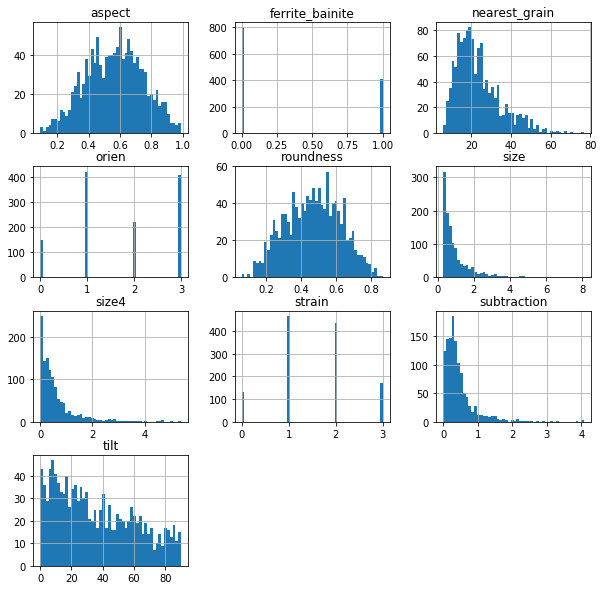

In [94]:
all_data.hist(bins=50, figsize=(10,10))
plt.show()

In [541]:
all_data.rename(columns={"division": "subtraction"}, inplace=True)

*複数の特徴量　離散化なし*

In [542]:
#体積減少値　出力
y_train = all_data.subtraction.values
# train = all_data.drop(['roundness', 'tilt', 'nearest_grain', 'ferrite_bainite', 'size4', 'subtraction'], axis=1).values
train = all_data.drop(['size4', 'subtraction'], axis=1).values
train = scipy.stats.zscore(train)

In [95]:
#体積減少率　出力
y_train = all_data.subtraction.values
train = all_data.drop(['size4', 'subtraction'], axis=1).values
train = scipy.stats.zscore(train)
#pd.DataFrame(train).to_csv('test_for_Weka.csv', index=False)

*複数の特徴量　離散化あり*

In [59]:
all_data.size = pd.qcut(all_data['size'], 5, labels=False)
all_data.aspect = pd.qcut(all_data['aspect'], 5, labels=False)
all_data.arclength = pd.qcut(all_data['arclength'], 5, labels=False)
all_data[['strain', 'orien']] = all_data[['strain', 'orien']].astype('int64')
y_train = all_data.subtraction.values
train = all_data.drop(['subtraction'], axis=1).values
train = scipy.stats.zscore(train)

*4つの特徴量　離散化なし*

In [ ]:
all_data = all_data[all_data.columns[[0,1,3,4,5]]]
y_train = all_data.subtraction.values
train = all_data.drop(['subtraction'], axis=1).values
train = scipy.stats.zscore(train)

*4つの特徴量　離散化あり*

In [217]:
all_data.size = pd.qcut(all_data['size'], 5, labels=False)
all_data.aspect = pd.qcut(all_data['aspect'], 5, labels=False)
all_data[['strain', 'orien']] = all_data[['strain', 'orien']].astype('int64')
all_data = all_data[all_data.columns[[3,4,5,6,7]]]
#all_data = all_data[all_data.columns[[0,1,3,4,5]]]
y_train = all_data.subtraction.values
train = all_data.drop(['subtraction'], axis=1).values
train = scipy.stats.zscore(train)

*size < 8.41の（68インスタンス）で6つの特徴量　離散化なし*

In [233]:
all_data = all_data[all_data['size'] < 8.411]
y_train = all_data.subtraction.values
#train = all_data.drop(['id', 'subtraction'], axis=1).values
train = all_data.drop(['id', 'boundary', 'structure', 'subtraction'], axis=1).values
train = scipy.stats.zscore(train)

In [543]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    train, y_train, test_size=0.2, random_state=42
)

In [544]:
print('xtrain shape: ', xtrain.shape)
print('y_train shape: ', ytrain.shape)
print('xtest shape: ', xtest.shape)
print('y_test shape: ', ytest.shape)

xtrain shape:  (963, 8)
y_train shape:  (963,)
xtest shape:  (241, 8)
y_test shape:  (241,)


## cross-validation開始

In [545]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
n_folds = 10

def rmsle_cv(model):
    kf = StratifiedKFold(n_folds, shuffle=True, random_state=42).get_n_splits(xtrain)
    rmse= np.sqrt(-cross_val_score(model, xtrain, ytrain, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

## 様々な予測器を試す。

In [546]:
from sklearn.kernel_ridge import KernelRidge
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [547]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [548]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [549]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)

In [550]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

## それぞれの予測器のrmseをみる

In [211]:
print('all_data : 5つの特徴量　離散化なし')
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(lin_reg)
print("\nlin_reg score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(forest_reg)
print("\nforest_reg score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

all_data : 5つの特徴量　離散化なし
Kernel Ridge score: 109.6903 (31.9492)
Xgboost score: 119.0218 (35.4846)
LGBM score: 133.7936 (26.8396)

lin_reg score: 109.4150 (24.8798)

forest_reg score: 119.3968 (33.4162)


In [68]:
print('all_data : 5つの特徴量　離散化あり')
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(lin_reg)
print("\nlin_reg score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(forest_reg)
print("\nforest_reg score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

all_data : 6つの特徴量　離散化あり
Kernel Ridge score: 129.0559 (49.5351)
Xgboost score: 143.6694 (33.8349)
LGBM score: 125.6899 (45.4931)

lin_reg score: 147.5255 (50.3988)

forest_reg score: 132.2010 (30.8317)


In [419]:
print('all_data : 4つの特徴量　離散化なし')
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(lin_reg)
print("\nlin_reg score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(forest_reg)
print("\nforest_reg score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

all_data : 4つの特徴量　離散化なし
Kernel Ridge score: 10.7307 (3.1743)
Xgboost score: 12.2000 (2.6617)
LGBM score: 10.0479 (4.0458)

lin_reg score: 9.9091 (2.8015)

forest_reg score: 10.3782 (3.2379)


In [306]:
print('all_data : 4つの特徴量　離散化あり')
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(lin_reg)
print("\nlin_reg score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(forest_reg)
print("\nforest_reg score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

all_data : 4つの特徴量　離散化あり
Kernel Ridge score: 18.0110 (9.1003)

Xgboost score: 17.6561 (8.8187)

LGBM score: 17.7170 (8.6502)


lin_reg score: 20.1769 (10.1799)


forest_reg score: 18.3700 (8.2380)



In [369]:
print('all_data : 4つの特徴量　体積減少率　離散化なし')
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(lin_reg)
print("\nlin_reg score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(forest_reg)
print("\nforest_reg score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

all_data : 4つの特徴量　体積減少率　離散化なし
Kernel Ridge score: 13.5557 (2.5681)

Xgboost score: 17.0989 (2.0803)

LGBM score: 14.1470 (2.1700)


lin_reg score: 13.4536 (2.4215)


forest_reg score: 14.4945 (2.3936)



In [429]:
print('all_data : 6つの特徴量　size < 8.41　離散化なし')
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(lin_reg)
print("\nlin_reg score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(forest_reg)
print("\nforest_reg score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

all_data : 6つの特徴量　size < 8.41　離散化なし
Kernel Ridge score: 1.1340 (0.3206)

Xgboost score: 1.0479 (0.3787)

LGBM score: 1.2026 (0.3548)


lin_reg score: 1.0365 (0.3083)


forest_reg score: 0.9399 (0.3471)



## correlation coefficientの計算と、random forestのGridSearch開始

In [551]:
def cc(y, y_pre):
    correlation = pd.DataFrame({'y':y, 'y_pre':y_pre})
    return print('correlation coefficient is: {0:0.3f}'.format(correlation.corr().iloc[0,1]))

In [552]:
model_xgb.fit(xtrain, ytrain)
cc(model_xgb.predict(xtest), ytest)

correlation coefficient is: 0.370


In [553]:
model_lgb.fit(xtrain, ytrain)
cc(model_lgb.predict(xtest), ytest)

correlation coefficient is: 0.368


In [554]:
lin_reg.fit(xtrain, ytrain)
cc(lin_reg.predict(xtest), ytest)

correlation coefficient is: 0.387


In [555]:
from sklearn.svm import SVR
svr = SVR(C=1.0, epsilon=0.2)
svr.fit(xtrain, ytrain)
cc(svr.predict(xtest), ytest)

correlation coefficient is: 0.432


In [556]:
from sklearn import svm
svm_lin = svm.LinearSVR()
svm_lin.fit(xtrain, ytrain)
cc(svm_lin.predict(xtest), ytest)

correlation coefficient is: 0.391


In [557]:
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor(random_state=1)
#hidden_layer_sizes=(5, ), activation=’relu’, solver=’adam’, alpha=0.0001, batch_size=’auto’, 
#learning_rate=’constant’, learning_rate_init=0.001, max_iter=200, shuffle=True, momentum=0.9
mlp_reg.fit(xtrain, ytrain)
cc(mlp_reg.predict(xtest), ytest)

correlation coefficient is: 0.424


In [558]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR.fit(xtrain, ytrain)
cc(KRR.predict(xtest), ytest)

correlation coefficient is: 0.424


In [559]:
forest_reg = RandomForestRegressor(random_state=1)
forest_reg.fit(xtrain, ytrain)
cc(forest_reg.predict(xtest), ytest)

correlation coefficient is: 0.409


mean correlation:  0.4086149876969849


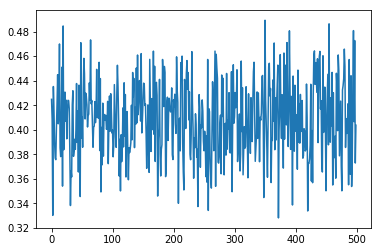

In [560]:
import matplotlib.pyplot as plt

nrange = range(0,500)
grid_score = []
feature_importances = np.ones((0,xtrain[0, :].shape[0]))

for i in nrange:
    forest_reg = RandomForestRegressor(random_state=i)
    forest_reg.fit(xtrain, ytrain)
    correlation = pd.DataFrame({'y':ytest, 'y_pre':forest_reg.predict(xtest)})
    grid_score.append(correlation.corr().iloc[0,1])
    fi = forest_reg.feature_importances_.reshape(1,-1)
    feature_importances = np.r_[feature_importances, fi]
print('mean correlation: ', np.mean(grid_score))
plt.plot(nrange, grid_score)
plt.show()

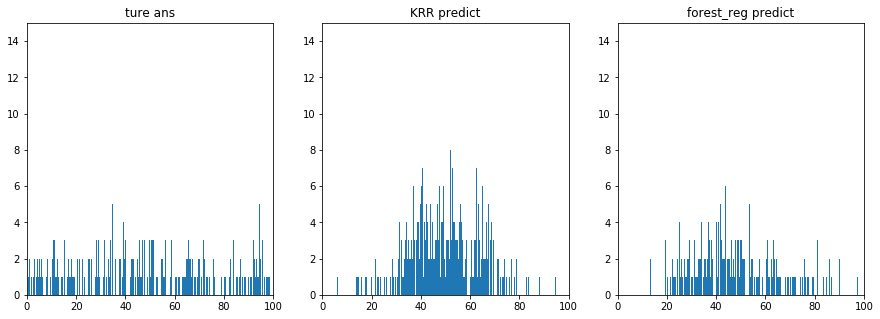

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(ytest, bins=ytest.shape[0])
plt.title('ture ans')
plt.xlim([min(ytest), max(ytest)])
plt.ylim([0, 15])

plt.subplot(1,3,2)
plt.hist(KRR.predict(xtest), bins=ytest.shape[0])
plt.title('KRR predict')
plt.xlim([min(ytest), max(ytest)])
plt.ylim([0, 15])

plt.subplot(1,3,3)
plt.hist(forest_reg.predict(xtest), bins=ytest.shape[0])
plt.title('forest_reg predict')
plt.xlim([min(ytest), max(ytest)])
plt.ylim([0, 15])

plt.show()

*4% (subtraction = サイズ - 変形後サイズ/3)　4つ　離散化なし*

In [80]:
print('4 features without recretization')
pd.DataFrame(feature_importances.mean(axis=0), index=list(all_data.columns[0:4]), columns=['feature_importances_'])

4 features without recretization


,feature_importances_
strain,0.003868
orien,0.003240
aspect,0.015890
size,0.977001


4% 4つ（体積減少率）離散化なし

In [367]:
pd.DataFrame(feature_importances.mean(axis=0), index=list(all_data.columns[:4]), 
             columns=['feature_importances_'])

,feature_importances_
strain,0.072540
orien,0.051389
aspect,0.294003
size,0.582068


4% 4つ (サイズ<100)　離散化なし

In [418]:
pd.DataFrame(feature_importances.mean(axis=0), index=list(all_data.columns[:4]), 
             columns=['feature_importances_'])

,feature_importances_
strain,0.129779
orien,0.044086
aspect,0.354375
size,0.471760


*12% 4つ ( size < 8.41)　離散化なし*

In [245]:
pd.DataFrame(feature_importances.mean(axis=0), index=list(all_data.columns[3:7]), 
             columns=['feature_importances_'])

,feature_importances_
strain,0.050831
orien,0.042516
aspect,0.104693
size,0.801959


*12% 4つ　離散化あり*

In [230]:
print('4 features without recretization')
pd.DataFrame(feature_importances.mean(axis=0), index=list(all_data.columns[0:4]), columns=['feature_importances_'])

4 features without recretization


,feature_importances_
strain,0.123451
orien,0.161108
aspect,0.119547
size,0.595894


12% 6つ　離散化なし

In [163]:
pd.DataFrame(feature_importances.mean(axis=0), index=list(all_data.columns[1:7]), 
             columns=['feature_importances_'])

,feature_importances_
boundary,0.007702
structure,0.006475
strain,0.011902
orien,0.009008
aspect,0.016138
size,0.948775


12% 6つ→4つ　離散化なし

In [184]:
pd.DataFrame(feature_importances.mean(axis=0), index=list(all_data.columns[3:7]), 
             columns=['feature_importances_'])

,feature_importances_
strain,0.012899
orien,0.010522
aspect,0.018304
size,0.958275


12% 6つ（体積減少率）離散化なし

In [342]:
pd.DataFrame(feature_importances.mean(axis=0), index=list(all_data.columns[1:7]), 
             columns=['feature_importances_'])

,feature_importances_
boundary,0.041607
structure,0.060747
strain,0.159143
orien,0.127619
aspect,0.245961
size,0.364924


*12% 6つ（体積減少率）離散化なし　テストデータ学習データと同じで過学習必須*

In [79]:
pd.DataFrame(feature_importances.mean(axis=0), index=list(all_data.columns[1:7]), 
             columns=['feature_importances_'])

,feature_importances_
boundary,0.046075
structure,0.066272
strain,0.153843
orien,0.124694
aspect,0.251942
size,0.357173


*初のsubtraction自動　4つの特徴量　離散化なし*

In [73]:
pd.DataFrame(feature_importances.mean(axis=0), index=['strain', 'orien', 'aspect', 'size'], 
             columns=['feature_importances_'])

,feature_importances_
strain,0.015187
orien,0.067124
aspect,0.060852
size,0.856836


*初のsubtraction自動　4つの特徴量（体積減少率）　離散化なし*

In [36]:
pd.DataFrame(feature_importances.mean(axis=0), index=['strain', 'orien', 'aspect', 'size'], 
             columns=['feature_importances_'])

,feature_importances_
strain,0.101194
orien,0.102540
aspect,0.416900
size,0.379366


*初の自動認識　5つの特徴量（体積減少率）　離散化なし*

In [63]:
pd.DataFrame(feature_importances.mean(axis=0), index=list(all_data.columns[:5]), 
             columns=['feature_importances_'])

,feature_importances_
strain,0.084779
orien,0.055584
arclength,0.232967
aspect,0.318043
size,0.308627


*初の自動認識　5つの特徴量　離散化なし*

In [87]:
pd.DataFrame(feature_importances.mean(axis=0), index=list(all_data.columns[:5]), 
             columns=['feature_importances_'])

,feature_importances_
strain,0.031859
orien,0.012597
arclength,0.067017
aspect,0.179585
size,0.708942


*自動認識　8つの特徴量　離散化なし*

In [88]:
pd.DataFrame(feature_importances.mean(axis=0), index=list(all_data.columns[:-2]), 
             columns=['feature_importances_'])

,feature_importances_
strain,0.042175
orien,0.041410
roundness,0.138387
aspect,0.142557
size,0.244387
tilt,0.176595
nearest_grain,0.196029
ferrite_bainite,0.018460


*体積減少値　自動認識　8つの特徴量　離散化なし*

In [115]:
pd.DataFrame(feature_importances.mean(axis=0), index=list(all_data.columns[:-2]), 
             columns=['feature_importances_'])

,feature_importances_
strain,0.026548
orien,0.027599
roundness,0.077123
aspect,0.075436
size,0.619530
tilt,0.076425
nearest_grain,0.078113
ferrite_bainite,0.019227


*体積減少値　自動認識　4つの特徴量　離散化なし*

In [184]:
pd.DataFrame(feature_importances.mean(axis=0), index=['strain', 'orien', 'aspect', 'size', 'ferrite_bainite'], 
             columns=['feature_importances_'])

,feature_importances_
strain,0.055371
orien,0.047588
aspect,0.162069
size,0.703401
ferrite_bainite,0.031570


(-4.560848382006038, -4.29673661302191, -2.404961571719675, 0.24345789596743134, 0.3935047782049987, 2.034725507243953, 2.4843561469367845, 4.031588014550612)


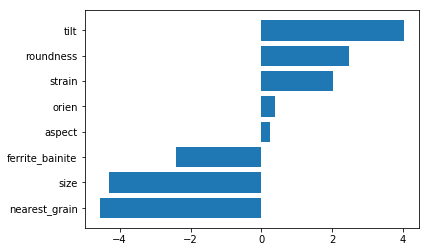

In [38]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    print(imp)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = list(all_data.columns[:-2])
svm_lin = svm.LinearSVR()
svm_lin.fit(xtrain, ytrain)
f_importances(svm_lin.coef_, features_names)

In [60]:
from sklearn.decomposition import PCA
pca = PCA()
train_pca = pca.fit_transform(pd.DataFrame(xtrain))
print(list(all_data.columns[:-2]))
print([round(i, 2) for i in pca.explained_variance_ratio_])

['strain', 'orien', 'roundness', 'aspect', 'size', 'tilt', 'nearest_grain', 'ferrite_bainite']
[0.23, 0.16, 0.13, 0.13, 0.12, 0.1, 0.08, 0.05]
